# Fig S2


- Load full dataset
- Plot stimulus, regular for all of them
- determine the pyschometric animals and add them to config
- can play around with hit rate or n samples for size, but keep this to 10 minutes max


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from violmulti.data.dataset_loader import DatasetLoader

%load_ext autoreload
%autoreload 2

sns.set_context("notebook")

# 0. Load Data


In [3]:
df = DatasetLoader(data_type="new_all").load_data()

DataLoader: Loading data for animal ids:  ['W051', 'W060', 'W065', 'W066', 'W068', 'W072', 'W073', 'W074', 'W075', 'W078', 'W080', 'W081', 'W082', 'W083', 'W088', 'W089', 'W094']


# 1. Stimulus Pairs by Animal


In [6]:
df.head()

,animal_id,session_date,session_file_counter,rig_id,training_stage,s_a,s_b,hit,violation,trial_not_started,...,l_water_vol,r_water_vol,antibias_beta,antibias_right_prob,using_psychometric_pairs,choice,session,session_relative_to_old,n_prev_trial_not_started,trial
0,W051,2013-07-17,1,2,1,NaN,NaN,1.0,0,False,...,18.000000,18.000000,0,0.0,NaN,0,1,1.0,0.0,1
1,W051,2013-07-17,1,2,1,NaN,NaN,0.0,0,False,...,18.000001,18.000001,0,0.0,NaN,1,1,1.0,0.0,2
2,W051,2013-07-17,1,2,1,NaN,NaN,1.0,0,False,...,18.000004,18.000004,0,0.0,NaN,0,1,1.0,0.0,3
3,W051,2013-07-17,1,2,1,NaN,NaN,0.0,0,False,...,18.000014,18.000014,0,0.0,NaN,0,1,1.0,0.0,4
4,W051,2013-07-17,1,2,1,NaN,NaN,0.0,0,False,...,18.000033,18.000033,0,0.0,NaN,1,1,1.0,0.0,5


In [10]:
df["stim_pair"] = df.apply(lambda x: (x["s_a"], x["s_b"]), axis=1)
df.head()
df["stim_pair"].value_counts()

stim_pair
(60.0, 68.0)    327433
(68.0, 60.0)    315342
(92.0, 84.0)    305854
(76.0, 68.0)    287742
(76.0, 84.0)    287068
                 ...  
(43.0, 48.0)        72
(37.0, 31.0)        71
(31.0, 26.0)        70
(54.0, 48.0)        69
(68.0, 74.0)         1
Name: count, Length: 82, dtype: int64

# 2. Plot stimulus pairs


In [67]:
def plot_stim_pairs(df, ax=None, hue=None, **kwargs):
    if ax is None:
        if hue is not None:
            fig, ax = plt.subplots(figsize=(6, 4))
        else:
            fig, ax = plt.subplots(figsize=(5, 5))

    plot_df = df.query("training_stage >= 4")
    stim_table = (
        plot_df.groupby(["s_a", "s_b"])
        .agg(hit_rate=("hit", "mean"), trial_count=("hit", "size"), viol_rate=("violation", "mean"))
        .reset_index()
    )
    scatter_sizes = stim_table.trial_count / 100

    if hue is not None:
        c_hue = stim_table[hue]
    else:
        c_hue = None

    # plot each sa,sb pair with rate as color
    scatter = ax.scatter(
        stim_table.s_a,
        stim_table.s_b,
        marker=",",
        s=scatter_sizes,
        c=c_hue,
        **kwargs
    )

    if hue is not None:
        # Add a colorbar to the plot
        cbar = plt.colorbar(scatter, ax=ax)
        cbar.set_label(f"{hue}")

    animal_id = plot_df .animal_id.unique()[0]
    n_stim_pairs = plot_df.stim_pair.nunique()
    ax.axline(xy1=(60, 60), slope=1, color="lightgray", linestyle="--")
    ax.set(xlabel="Stimulus A dB", ylabel="Stimulus B dB", title=f"{animal_id} Stimulus Pairs: N = {n_stim_pairs}")

    return None

In [63]:
def plot_stimulus_pairs_by_animal(df, hue=None, **kwargs):
    n_animals = df.animal_id.nunique()
    print(f"Number of animals: {n_animals}")
    n_rows = 4
    n_cols = 5
    fig, ax = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 5 * n_rows))

    # Plot- iterate over grid
    for ii, (animal_id, sub_df) in enumerate(df.groupby("animal_id")):
        row_idx, col_idx = np.unravel_index(ii, (n_rows, n_cols))
        current_ax = ax[row_idx, col_idx] if n_rows > 1 else ax[col_idx]
        plot_stim_pairs(sub_df, current_ax, hue=hue, **kwargs)

    # Remove empty subplots if the number of animals doesn't fill the entire grid
    for ax_idx in range(n_animals, n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(ax.flatten()[ax_idx])
        else:
            fig.delaxes(ax[ax_idx])

    plt.tight_layout()
    return fig, ax


### Stim by Size


Number of animals: 17


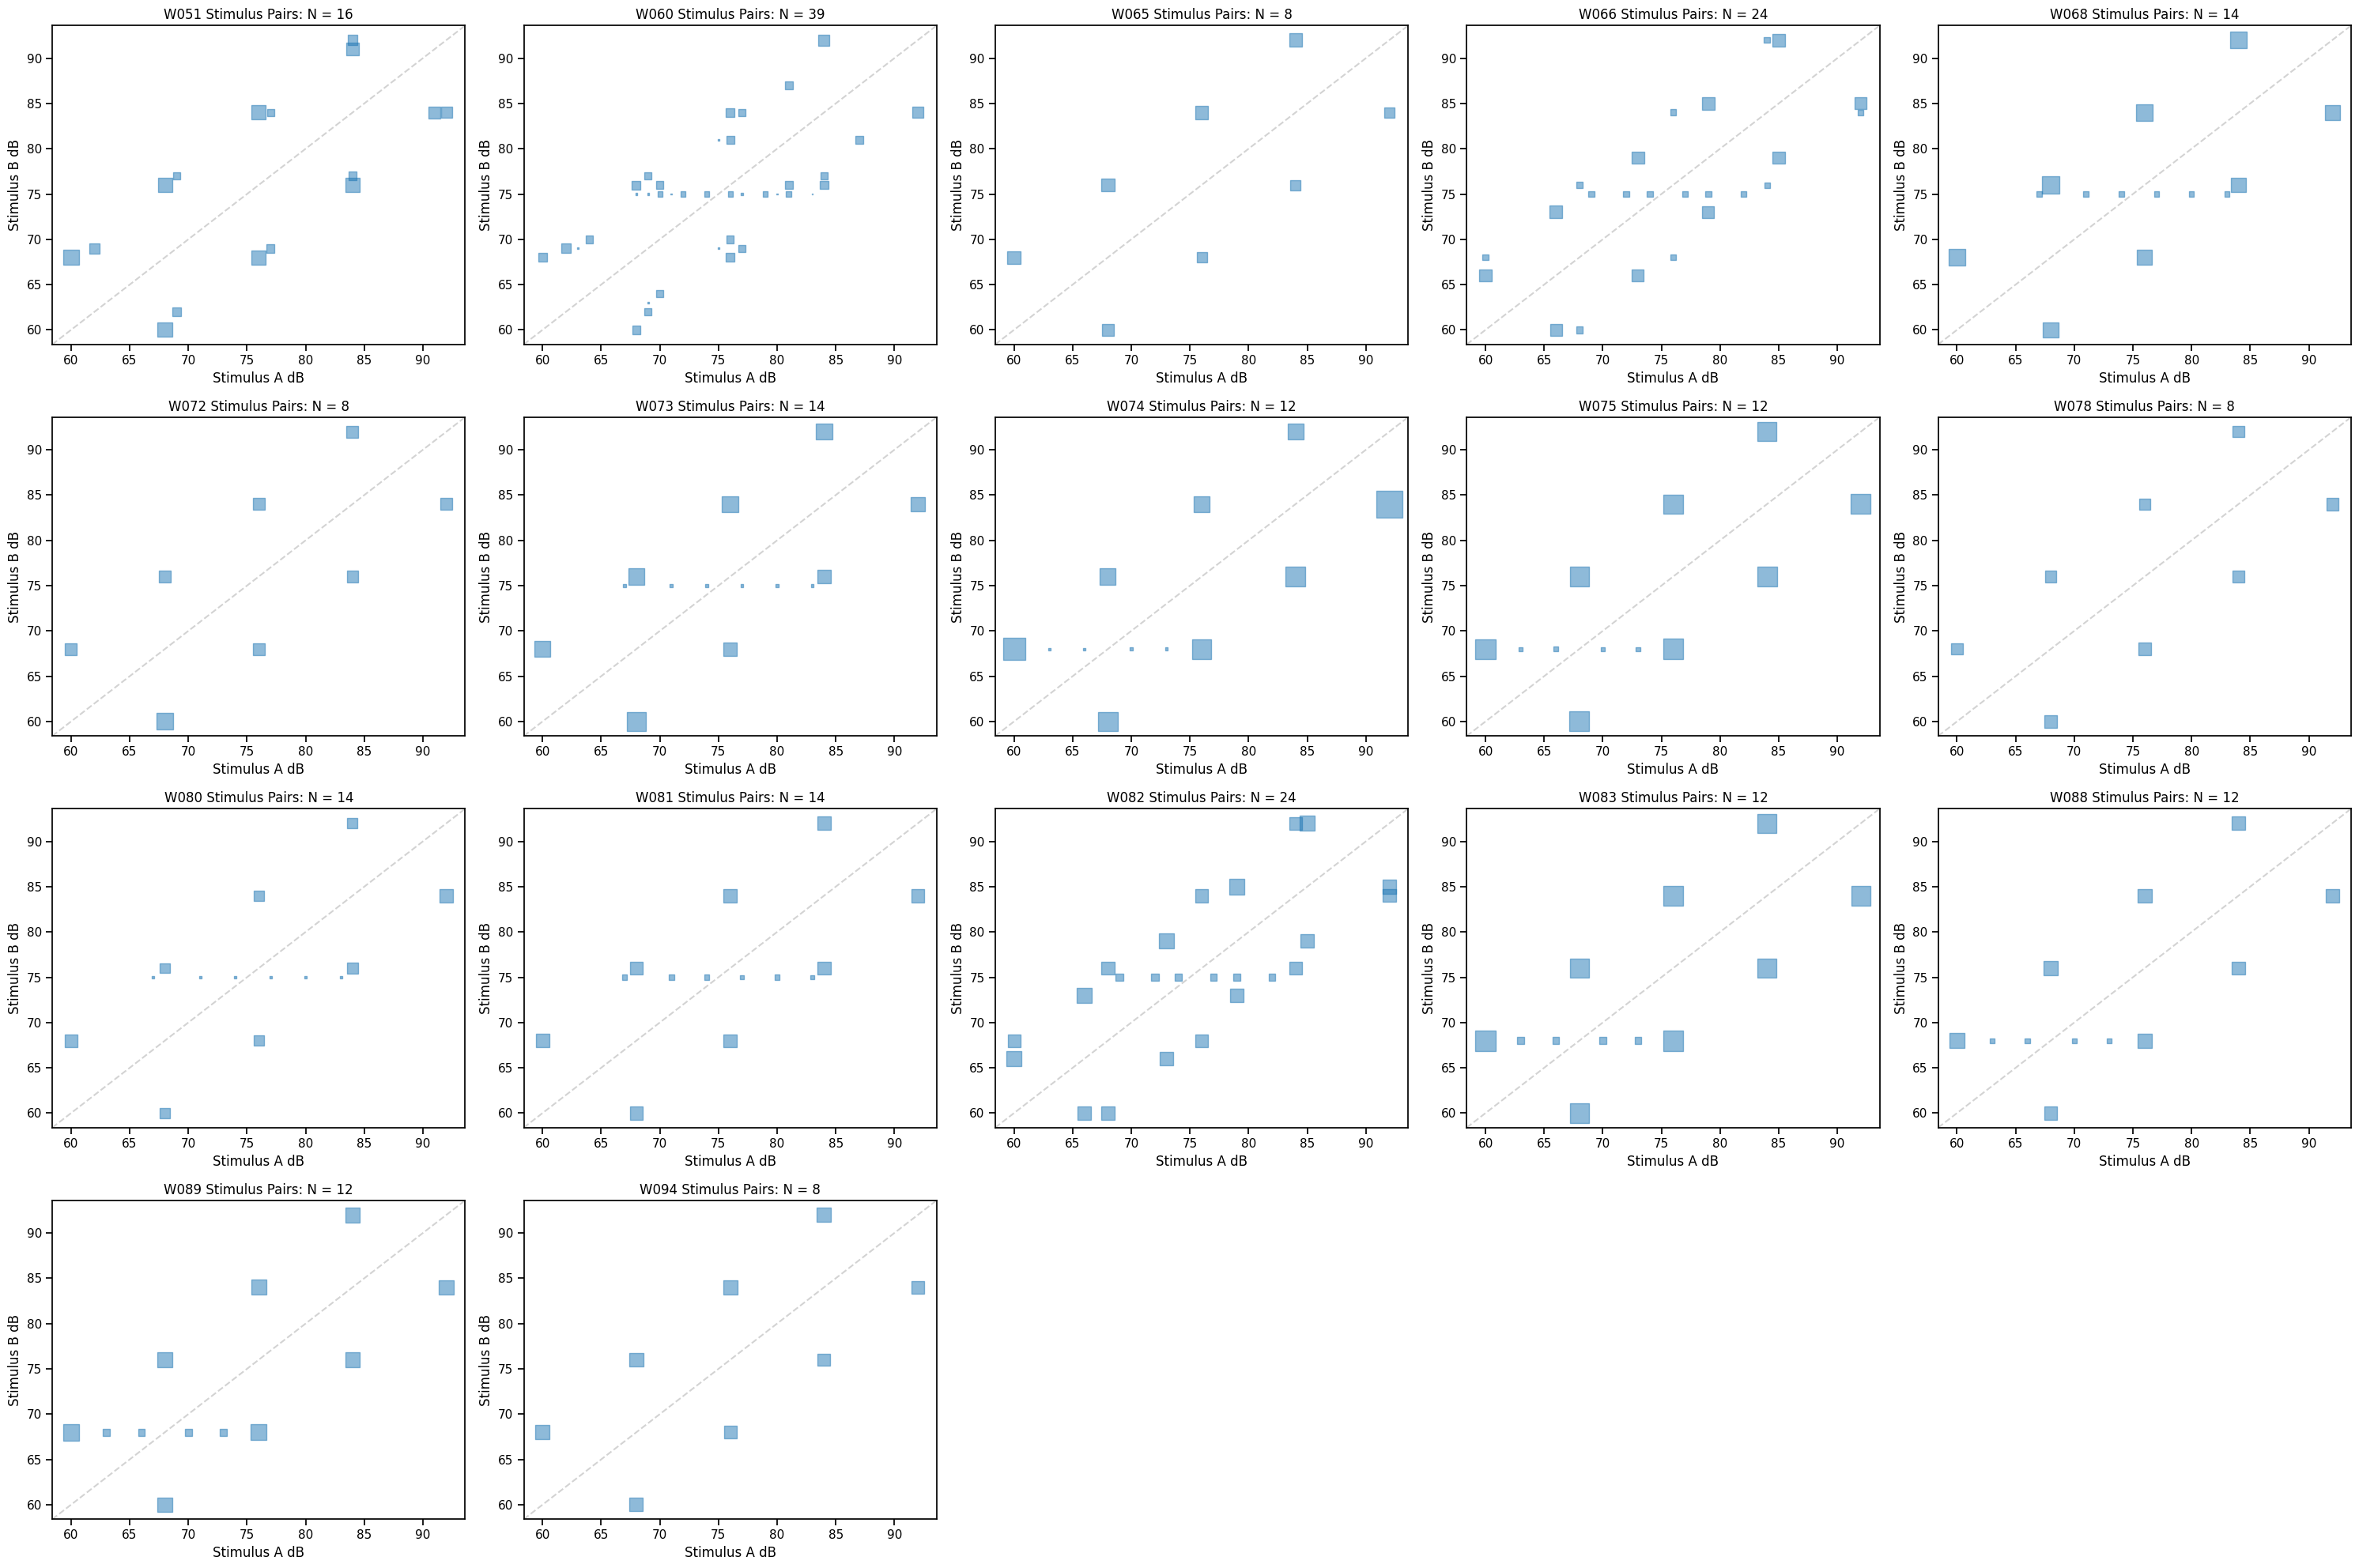

In [ ]:
fig, ax =plot_stimulus_pairs_by_animal(df, alpha=0.5)
fig.savefig("figures/figS2_stimulus_pairs_size_by_animal.png", dpi=300)

### Stim by Hit Rate


Number of animals: 17


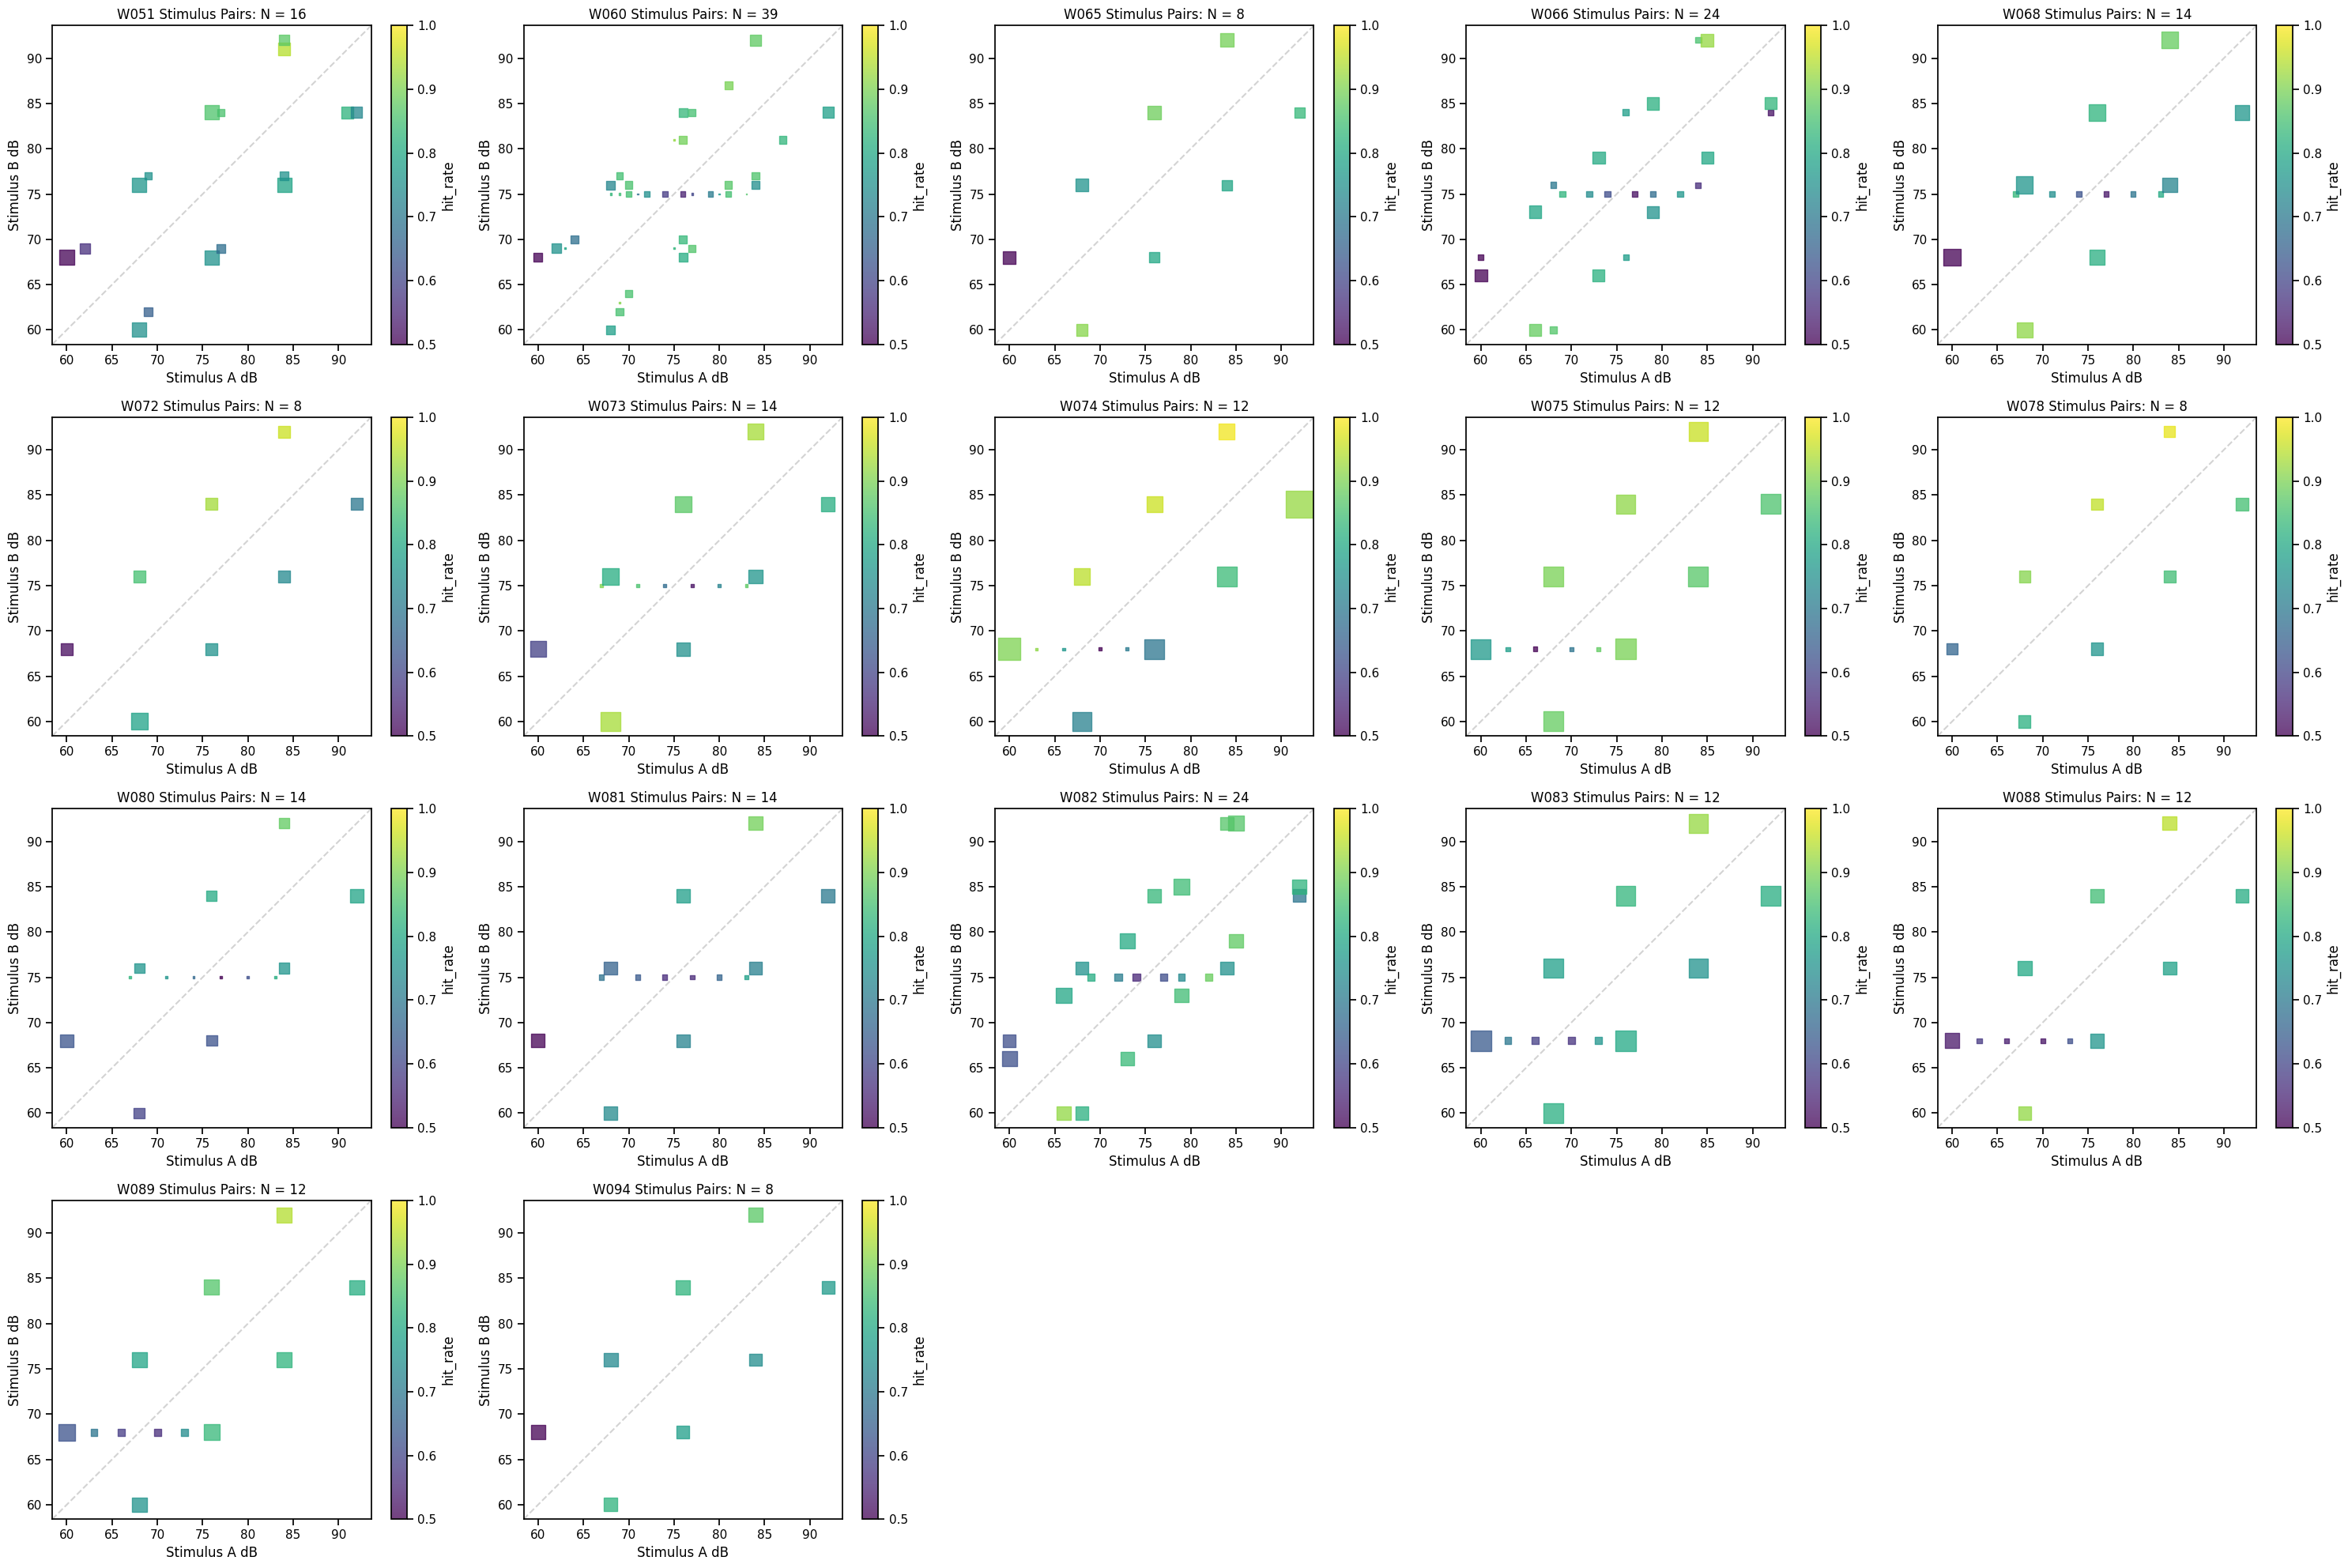

In [72]:
fig, ax =plot_stimulus_pairs_by_animal(df, hue="hit_rate", cmap="viridis", alpha=0.75, vmin=0.5, vmax=1)
fig.savefig("figures/figS2_stimulus_pairs_hit_rate_by_animal.png", dpi=300)

### Stim by Violation Rate


Number of animals: 17


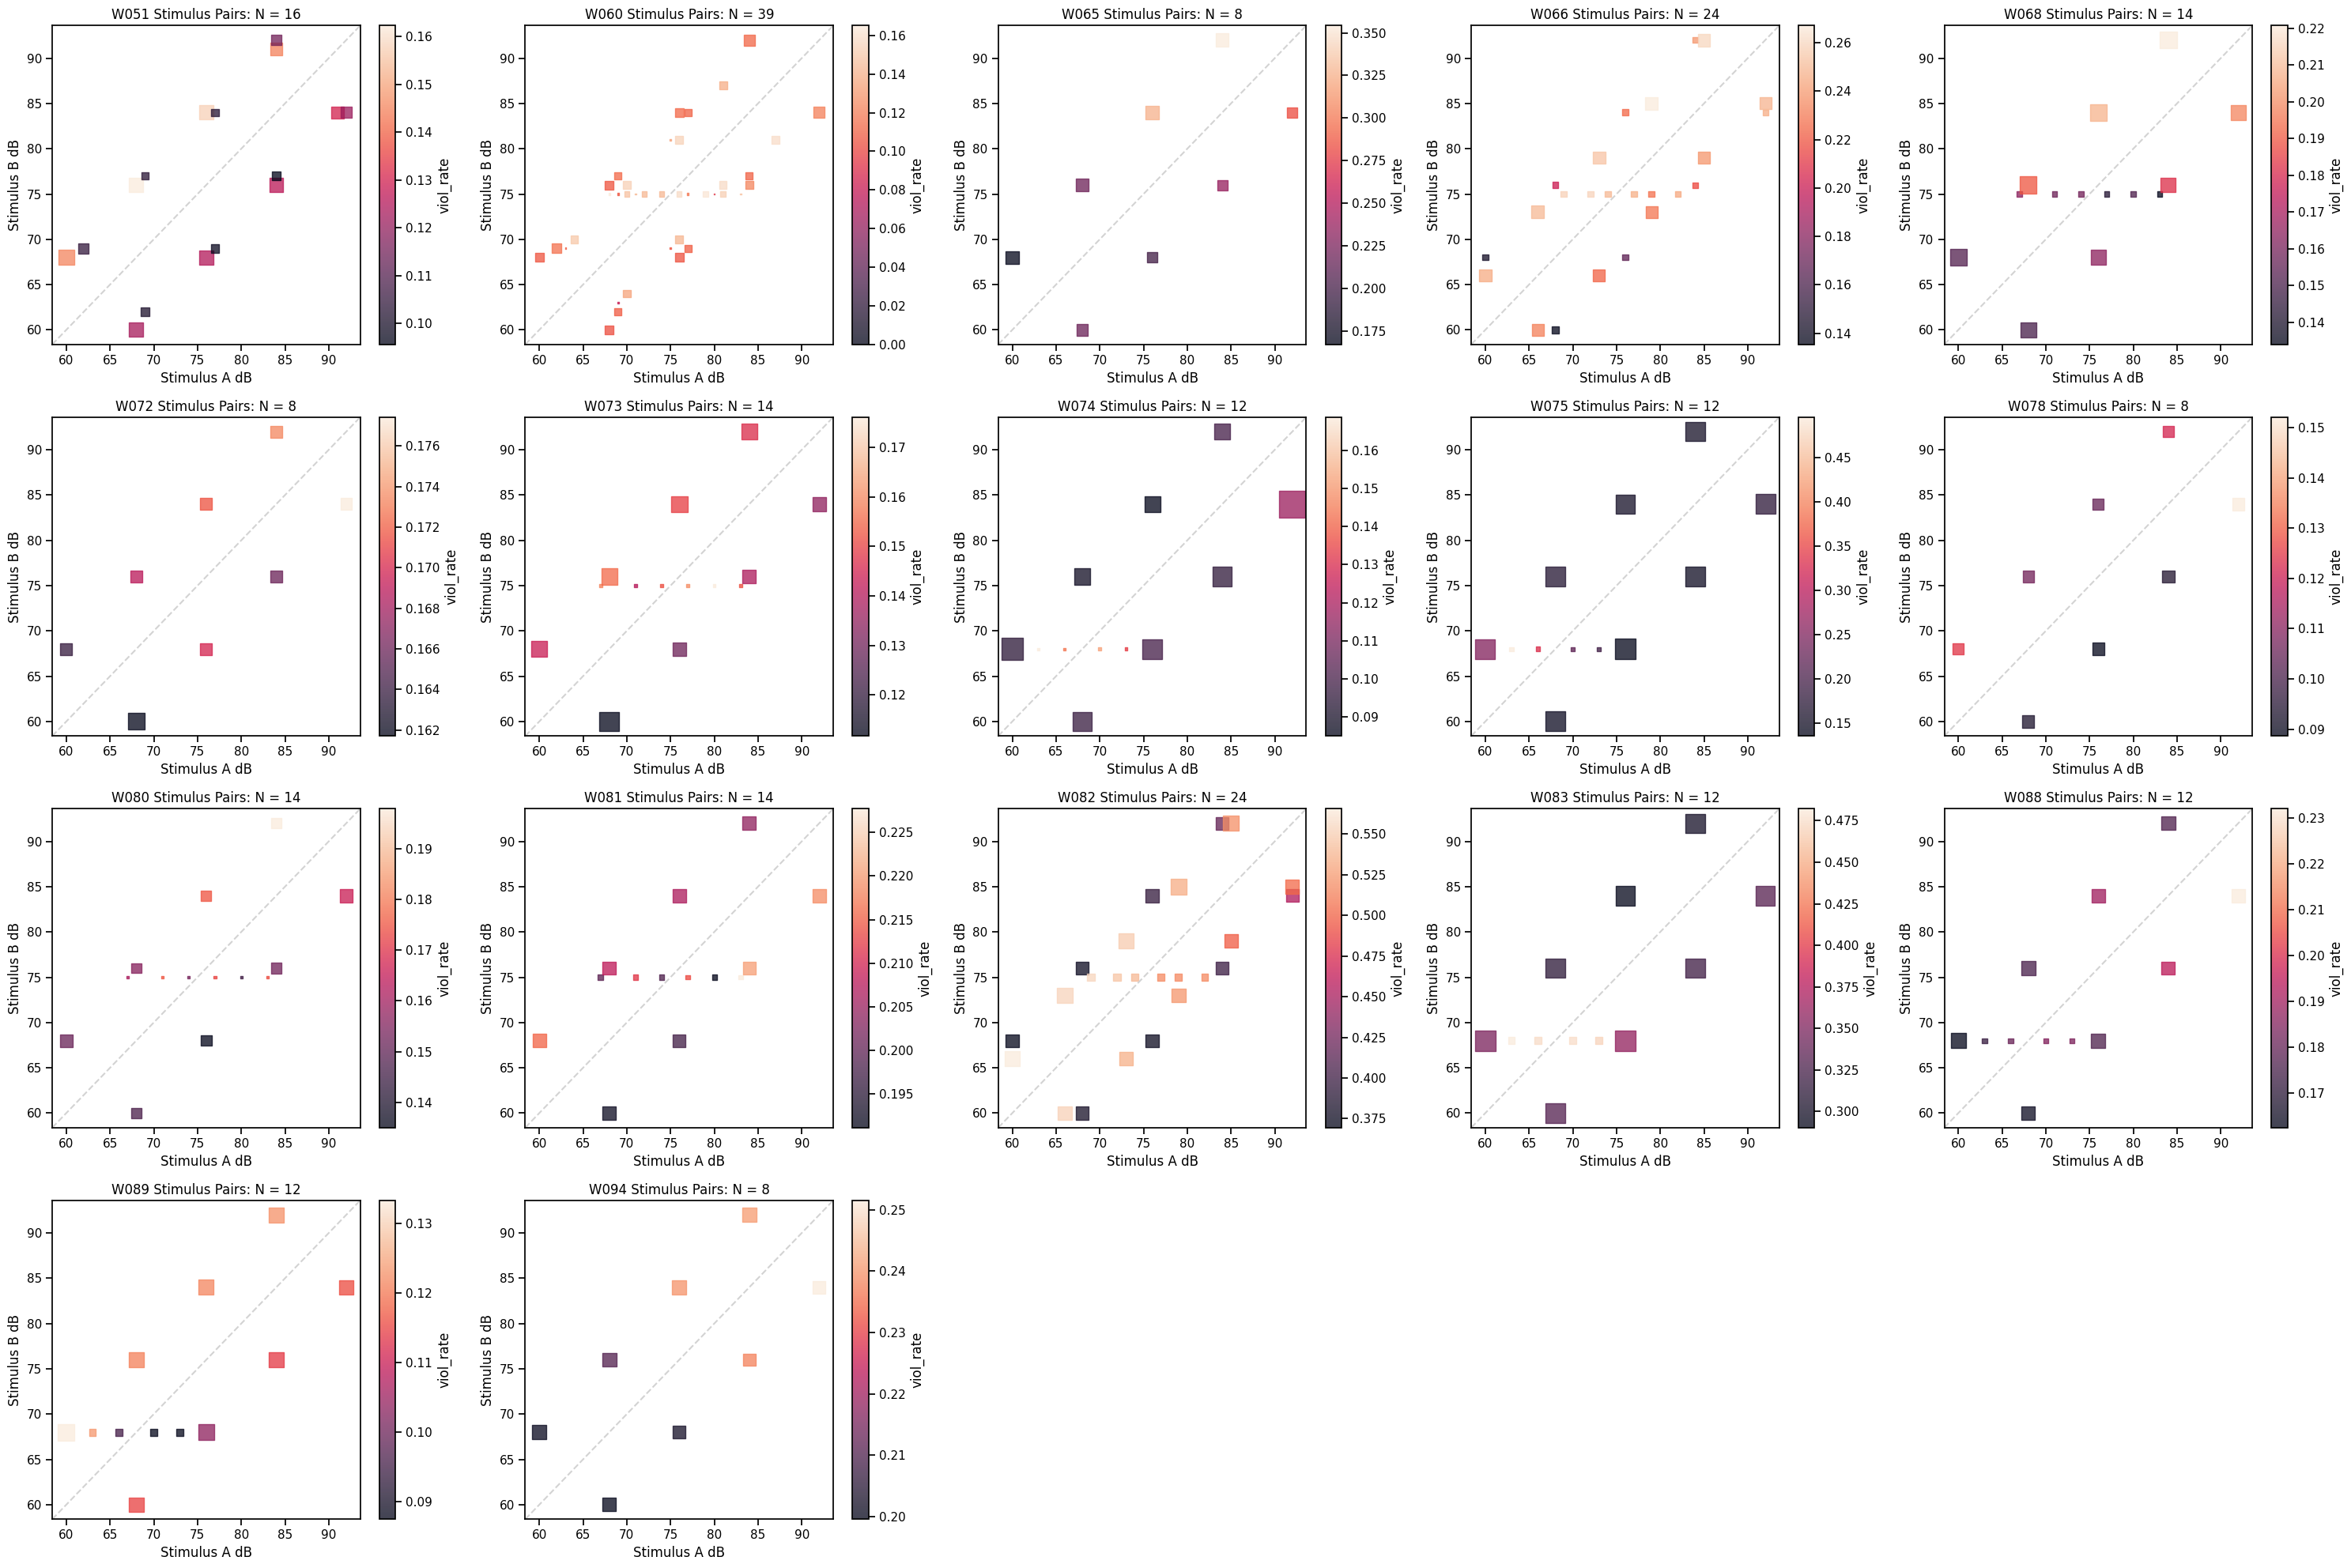

In [71]:
fig, ax =plot_stimulus_pairs_by_animal(df, hue="viol_rate", cmap="rocket", alpha=0.75)
fig.savefig("figures/figS2_stimulus_pairs_viol_rate_by_animal.png", dpi=300)